Question 3 Python
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299


In [53]:
#Step1
import pandas as pd
import numpy as np
from numpy.random import randint  #https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/

#Step2
s1=pd.Series(randint(1,4,100))
s2=pd.Series(randint(1,3,100))
s3=pd.Series(randint(10000,30000,100))

#Step3
df=pd.DataFrame({'s1':s1,'s2':s2,'s3':s3})

#Step4
df=df.rename(columns=({'s1':'bedrs','s2':'bathrs','s3':'price_sqr_meter'}))

#Step5
s4=pd.Series([s1,s2,s3])
seriesArray=[[s1],[s2],[s3]]
df2=pd.DataFrame(s4)

#Step7
df2.columns=['bigcolumn']
print(df2)

                                           bigcolumn
0  0     2
1     2
2     3
3     1
4     3
     ....
1  0     1
1     2
2     1
3     2
4     2
     ....
2  0     21264
1     24465
2     15775
3     1715...


Question 4 Python
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.


In [83]:
#step1
import pandas as pd
import datetime

#step2
file=pd.read_table("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data", delim_whitespace=True)  #https://stackoverflow.com/questions/30762762/convert-data-file-to-csv

#step3
data=pd.DataFrame(file)

#step4
data['Yr']=data['Yr'].apply(lambda x: 20 if x>20 else data['Yr'])

#step5
data['Yr']+=2000
data['Date']=pd.to_datetime(data.Yr*10000+data.Mo*100+data.Dy,format='%Y%m%d')
data.drop(columns=['Yr','Mo','Dy'], axis=1, inplace=True)
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]
data.index=data['Date']

#step6
data.isnull().sum()

#step7
data.count().sum()
data.dropna(axis=0)

#step8
avgWindSpeeds=data[['RPT', 'VAL', 'ROS', 'KIL','SHA','BIR', 'DUB','CLA','MUL','CLO','BEL','MAL']].mean()
print(avgwindSpeeds)

#step9
minWindSpeeds=data[['RPT', 'VAL', 'ROS', 'KIL','SHA','BIR', 'DUB','CLA','MUL','CLO','BEL','MAL']].min()
maxWindSpeeds=data[['RPT', 'VAL', 'ROS', 'KIL','SHA','BIR', 'DUB','CLA','MUL','CLO','BEL','MAL']].max()
stdWindSpeeds=data[['RPT', 'VAL', 'ROS', 'KIL','SHA','BIR', 'DUB','CLA','MUL','CLO','BEL','MAL']].std()
cols2=['AvgWS','MinWS','MaxWS','StdWS']
loc_stats=pd.DataFrame({'AvgWS':avgWindSpeeds,'MinWS':minWindSpeeds,'MaxWS':maxWindSpeeds,'StdWS':stdWindSpeeds})

#step10
dayAvg=data['mean'] = data.mean(axis=1)
day_stats=pd.DataFrame({'Daily Average':dayAvg})
day_stats

#step11
janVal=(data.index.month==1)
janVal.mean()



,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,20,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,20,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,20,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,20,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,20,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,20,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,20,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,20,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,20,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


#Question 5 Python
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [122]:
#step1
import pandas as pd

#step2
file=pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')

#step3
chipo=pd.DataFrame(file)

#step4
chipo.head(10)

#step5
numberOfObservations=(len(chipo.columns)*len(chipo.index))-chipo.isnull().sum().sum()
numberOfObservations

#step6
len(chipo.columns)

#step7
print(chipo.columns)
#step8
print(chipo.index)

#step9
chipo['item_name'].value_counts()
#Chicken Bowl is the most ordered item

#step10
max(chipo['item_name'].value_counts())

#step11
chipo['choice_description'].value_counts()
#Diet Coke is the most ordered item in the choice_description column

#step12
chipo['item_name'].nunique()

#step13
#chipo.astype({'item_price' : float}) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
chipo.dtypes

chipo

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [ ]:
data['f']= data['Yr'] + 1
max(chipo['choice_description'])



Question 6 Python Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

Text(0, 0.5, 'Count')

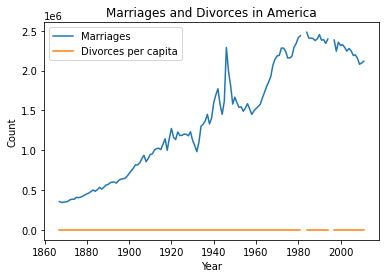

In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir("C:\\Users\\Andrew\\Desktop\\Georgian\\BDAT 1004 Python\\Problem Set 3 Data\\")
div= pd.read_csv("us-marriages-divorces-1867-2014.csv")
div["Divorces per capita"]= div["Divorces"]/div["Population"]


fig, ax = plt.subplots()
x_data= div["Year"]
columns= [div["Marriages"], div["Divorces per capita"]]
for column in columns:
    ax.plot(x_data,column)
ax.legend(["Marriages","Divorces per capita"])
ax.set_title('Marriages and Divorces in America')
ax.set_xlabel('Year')
ax.set_ylabel('Count')



Question 7:
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

Text(0, 0.5, 'Count')

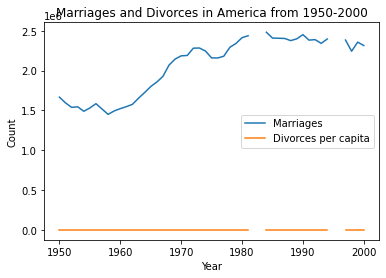

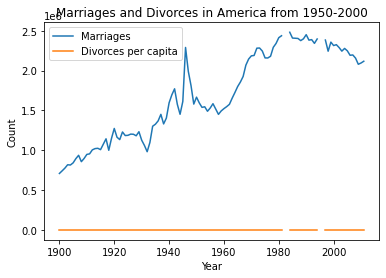

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
div= pd.read_csv("us-marriages-divorces-1867-2014.csv")
div["Divorces per capita"]= div["Divorces"]/div["Population"]
df=pd.DataFrame(div)
1950-1867
df.drop(df.index[:83], axis=0,inplace=True)
144-83
df.drop(df.index[51:62], axis=0,inplace=True)

df1=pd.DataFrame(div)
1900-1867
df1.drop(df1.index[:33], axis=0,inplace=True)
144-33
#df.drop(df.index[51:62], axis=0,inplace=True)
df1[:51]

fig, ax = plt.subplots()
x_data= df["Year"]
columns= [df["Marriages"], df["Divorces per capita"]]
for column in columns:
    ax.plot(x_data,column)
ax.legend(["Marriages","Divorces per capita"])
ax.set_title('Marriages and Divorces in America from 1950-2000')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

fig, ax = plt.subplots()
x_data= df1["Year"]
columns= [df1["Marriages"], df1["Divorces per capita"]]
for column in columns:
    ax.plot(x_data,column)
ax.legend(["Marriages","Divorces per capita"])
ax.set_title('Marriages and Divorces in America from 1950-2000')
ax.set_xlabel('Year')
ax.set_ylabel('Count')





Question 8 Python
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

Text(0, 0.5, 'Actor')

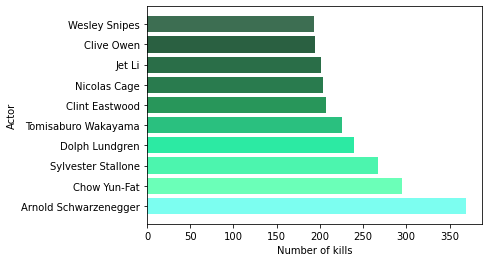

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
killC=pd.read_csv("actor_kill_counts.csv")
killC1=killC.sort_values('Count',ascending=False)
x_data=killC1['Actor']
y_data=killC1['Count']
colours = ['#7CFEF0','#6BFFB8','#4CF5AE','#2CEAA3','#2AC07F','#28965A','#297B4E','#2A6E48','#2A6041','#3D6E52']
plt.barh(x_data,y_data, color=colours)
plt.xlabel('Number of kills')
plt.ylabel('Actor')

fig, ax = plt.subplots()
x_data= df1["Year"]
columns= [df1["Marriages"], df1["Divorces per capita"]]
for column in columns:
    ax.plot(x_data,column)
ax.legend(["Marriages","Divorces per capita"])
ax.set_title('Marriages and Divorces in America from 1900-1950')
ax.set_xlabel('Year')
ax.set_ylabel('Count')




Question 9 Python
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

([<matplotlib.patches.Wedge at 0x28e40252310>,
 [Text(0.6317185617385839, 1.0202605837505119, 'Assassinated'),
  Text(-0.5352649900999041, 0.9609845942435028, 'Died in captivity'),
  Text(-0.7027315453508087, 0.8462673189772039, 'Executed'),
  Text(-0.9609846741144727, 0.5352648467040413, 'Illness'),
  Text(-1.0953075843869309, -0.1014952983367519, 'Killed in battle'),
  Text(-0.39736573218118276, -1.0257194913269967, 'Natural causes'),
  Text(0.7410652911167327, -0.812909733182026, 'Possibly assassinated'),
  Text(1.070781888317532, -0.25184548368223825, 'Suicide')],
 [Text(0.36850249434750726, 0.5951520071877985, '32.4%'),
  Text(-0.29196272187267497, 0.5241734150419105, '1.5%'),
  Text(-0.3833081156458957, 0.4616003558057475, '4.4%'),
  Text(-0.5241734586078941, 0.29196264365674973, '7.4%'),
  Text(-0.5974405005746896, -0.05536107182004649, '11.8%'),
  Text(-0.21674494482609966, -0.5594833589056345, '23.5%'),
  Text(0.40421743151821776, -0.44340530900837777, '11.8%'),
  Text(0.58406

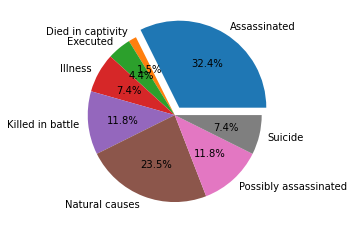

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
romEmp=pd.read_csv("roman-emperor-reigns.csv")
death=np.array(romEmp['Cause_of_Death'])
unique, counts = np.unique(death, return_counts=True)    #https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray
explode=(0.1,0,0,0,0,0,0,0)
plt.pie(counts,explode=explode,labels=unique,autopct='%1.1f%%')  #https://pythonspot.com/matplotlib-pie-chart/



Question 10 Python
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

Text(0, 0.5, 'Count')

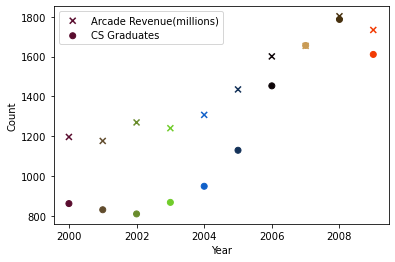

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
q3=pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
x_data=q3['Year']
y1_data=q3['Total Arcade Revenue (billions)']*1000
y2_data=q3['Computer Science Doctorates Awarded (US)']
colours = ['#590C2E','#614C2D','#698C2C','#71CC2B','#1060C9','#143259','#0D0508','#C99B55','#47310F','#F23A02']
plt.scatter(x_data,y1_data, marker="x",color=colours)
plt.scatter(x_data,y2_data,marker="o",color=colours)
plt.legend(("Arcade Revenue(millions)","CS Graduates"), loc="upper left")
plt.xlabel('Year')
plt.ylabel('Count')


fig, ax = plt.subplots()
ax.scatter(q3['Year'], q3['Total Arcade Revenue (billions)'])
ax.scatter(q3['Year'], q3['Computer Science Doctorates Awarded (US)'])
